<a href="https://colab.research.google.com/github/kwasicode/alx-system_engineering-devops/blob/master/OrganicRankineCycle_Co2working_fluid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install CoolProp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.0 MB/s eta 0:00:00


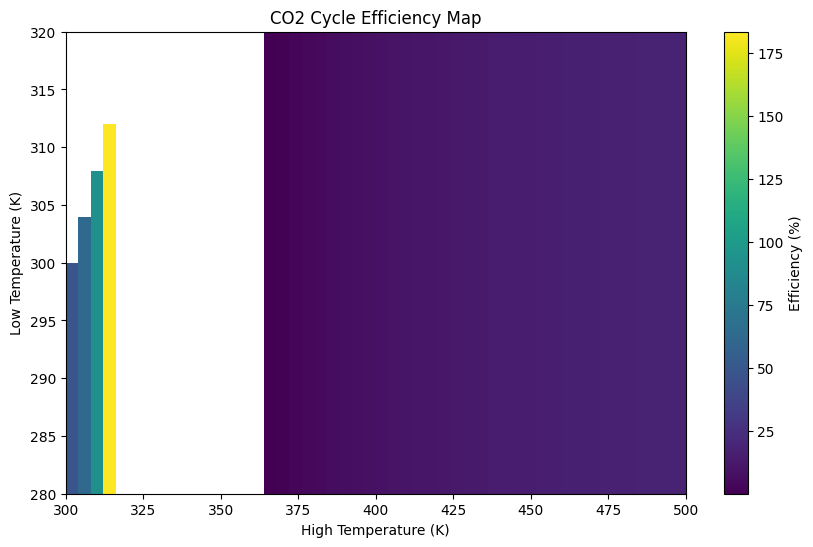

Efficiency at T_high = 423.15 K (150°C) and T_low = 298.15 K (25°C): 12.12%
Efficiency at T_high = 523.15 K (250°C) and T_low = 298.15 K (25°C): 18.96%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP

def co2_cycle_efficiency(T_high, T_low, P_high, P_low, eta_turbine=0.85, eta_pump=0.75):
    try:
        # Ensure T_high > T_low and P_high > P_low
        if T_high <= T_low or P_high <= P_low:
            return np.nan

        # State 1: Saturated liquid at P_low
        h1 = CP.PropsSI('H', 'P', P_low, 'Q', 0, 'CO2')
        s1 = CP.PropsSI('S', 'P', P_low, 'Q', 0, 'CO2')

        # State 2: Compressed liquid at P_high
        h2s = CP.PropsSI('H', 'P', P_high, 'S', s1, 'CO2')
        h2 = h1 + (h2s - h1) / eta_pump

        # State 3: Superheated vapor at T_high and P_high
        h3 = CP.PropsSI('H', 'T', T_high, 'P', P_high, 'CO2')
        s3 = CP.PropsSI('S', 'T', T_high, 'P', P_high, 'CO2')

        # State 4: Expanded vapor at P_low
        h4s = CP.PropsSI('H', 'P', P_low, 'S', s3, 'CO2')
        h4 = h3 - eta_turbine * (h3 - h4s)

        # Calculate work and heat
        w_pump = h2 - h1
        q_in = h3 - h2
        w_turbine = h3 - h4

        # Calculate efficiency
        efficiency = (w_turbine - w_pump) / q_in

        return efficiency if efficiency > 0 else np.nan  # Return NaN for negative efficiencies
    except Exception as e:
        print(f"Error: {e}")
        return np.nan

# Temperature ranges (in Kelvin)
T_low_range = np.linspace(280, 320, 50)
T_high_range = np.linspace(300, 500, 50)

# Pressure ranges (in Pa)
P_low = 5e6  # 50 bar
P_high = 30e6  # 300 bar

# Calculate efficiencies
efficiencies = np.zeros((len(T_high_range), len(T_low_range)))

for i, T_high in enumerate(T_high_range):
    for j, T_low in enumerate(T_low_range):
        efficiencies[i, j] = co2_cycle_efficiency(T_high, T_low, P_high, P_low)

# Plot results
plt.figure(figsize=(10, 6))
plt.imshow(efficiencies.T * 100, extent=[T_high_range[0], T_high_range[-1], T_low_range[0], T_low_range[-1]],
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Efficiency (%)')
plt.xlabel('High Temperature (K)')
plt.ylabel('Low Temperature (K)')
plt.title('CO2 Cycle Efficiency Map')
plt.show()

# Print specific efficiency values
print(f"Efficiency at T_high = 423.15 K (150°C) and T_low = 298.15 K (25°C): {co2_cycle_efficiency(423.15, 298.15, P_high, P_low) * 100:.2f}%")
print(f"Efficiency at T_high = 523.15 K (250°C) and T_low = 298.15 K (25°C): {co2_cycle_efficiency(523.15, 298.15, P_high, P_low) * 100:.2f}%")